# 📌 Task 4 – Sentiment Analysis with Model Training and Prediction

This notebook implements a sentiment classification system using logistic regression. It includes data preprocessing, TF-IDF feature extraction, model training, and sentiment prediction on new inputs.

## 🔹 Part 1: Model Training

Train a sentiment classification model using logistic regression on labeled tweet data. The pipeline includes preprocessing, vectorization using TF-IDF, label encoding, model training, evaluation, and saving the model.

In [ ]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction import text
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Download necessary resources
nltk.download('wordnet')
nltk.download('omw-1.4')

# Step 1: Load the Dataset
df = pd.read_csv('data/sentiment_dataset.csv')

# Step 2: Clean & Preprocess the Text
stop_words = text.ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)

# Step 3: Convert Text to TF-IDF Vectors (Improved)
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_df=0.9, min_df=3, max_features=10000, sublinear_tf=True)
X = vectorizer.fit_transform(df['clean_text'])

# Step 4: Encode Sentiment Labels
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

# Step 5: Train the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Step 7: Save the Model
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump((model, vectorizer, le), f)


[nltk_data] Downloading package wordnet to C:\Users\Pratham
[nltk_data]     Modi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Pratham
[nltk_data]     Modi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Accuracy: 1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1001
     neutral       1.00      1.00      1.00       968
    positive       1.00      1.00      1.00      1031

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



## 🔹 Part 2: Sentiment Prediction

Use the trained model to predict sentiment on new input text. This section includes model loading, text preprocessing, and a prediction function.

In [6]:
import pickle
import re
from sklearn.feature_extraction import text
from nltk.stem import WordNetLemmatizer
import nltk

# Download required resources
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load model, vectorizer, and label encoder
with open('sentiment_model.pkl', 'rb') as f:
    model, vectorizer, le = pickle.load(f)

# Initialize tools
stop_words = text.ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Prediction function with confidence
def predict_sentiment(text):
    cleaned = clean_text(text)
    vector = vectorizer.transform([cleaned])
    probabilities = model.predict_proba(vector)[0]
    prediction = model.predict(vector)[0]
    sentiment = le.inverse_transform([prediction])[0]
    confidence = round(max(probabilities) * 100, 2)
    return sentiment, confidence

# Example predictions
s, c = predict_sentiment("I love this product!")
print(f"Sentiment: {s} (Confidence: {c}%)")

s, c = predict_sentiment("It's okay, not great.")
print(f"Sentiment: {s} (Confidence: {c}%)")

s, c = predict_sentiment("Terrible experience!")
print(f"Sentiment: {s} (Confidence: {c}%)")


Sentiment: positive (Confidence: 89.98%)
Sentiment: neutral (Confidence: 98.37%)
Sentiment: negative (Confidence: 98.92%)


[nltk_data] Downloading package wordnet to C:\Users\Pratham
[nltk_data]     Modi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Pratham
[nltk_data]     Modi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 🔹 Part 3: Model Evaluation & Visualization
Evaluate model performance using precision, recall, and a confusion matrix. This helps us understand how well our sentiment classifier performs across each class.

Accuracy: 1.0


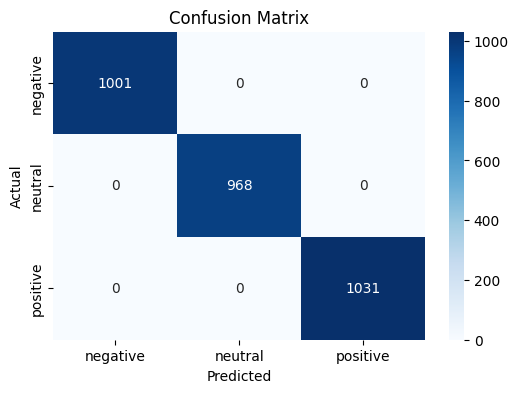

Precision Score: 1.0
Recall Score: 1.0


In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict again to get y_pred
y_pred = model.predict(X_test)

# Accuracy (optional here)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision and recall
print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
